## Did the impeachment skew the polls significantly?
## Was it predicatable?

Let's review the timeline of everything before we start
 
- September-November : Inquiry
- December 18, 2020 : Impeached by US HoR
- January 16, 2020 : Passed the Senate
- February 5, 2020 : Acquitted

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression

Create a training and testing model

What was Donald Trump's approval rating during his impeachment trial?

Impeached by the US HoR: Dec 18 2019

Timeline of data is from Dec 18 - Jan 14

In [29]:
approval_df = pd.read_csv("president_approval_polls.csv")
approval_df.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,119194,64608,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/25/20,2/27/20,NaN,True,2/28/20 09:27,NaN,http://www.rasmussenreports.com/public_content...,538,47.0,52.0
1,119031,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,42.0,53.0
2,119032,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,43.0,55.0
3,119075,64583,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/24/20,2/26/20,NaN,True,2/27/20 09:26,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0
4,119267,64591,2020.0,NaN,Donald Trump,590,Fox News/Beacon Research/Shaw & Co. Research,NaN,NaN,Fox News,...,2/23/20,2/26/20,NaN,NaN,2/28/20 18:00,NaN,https://www.scribd.com/document/449414637/Fox-...,538,47.0,52.0


In [30]:
approval_df.dtypes

question_id               int64
poll_id                   int64
cycle                   float64
state                   float64
politician               object
pollster_id               int64
pollster                 object
sponsor_ids              object
sponsors                 object
display_name             object
pollster_rating_id      float64
pollster_rating_name     object
fte_grade                object
sample_size               int64
population               object
population_full          object
methodology              object
start_date               object
end_date                 object
sponsor_candidate       float64
tracking                 object
created_at               object
notes                    object
url                      object
source                   object
yes                     float64
no                      float64
dtype: object

In [31]:
house = approval_df.loc[224:330].copy()
house.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
224,115710,63278,2020.0,NaN,Donald Trump,568,YouGov,352,Economist,YouGov,...,1/11/20,1/14/20,NaN,NaN,1/15/20 09:19,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,44.0,48.0
225,115711,63278,2020.0,NaN,Donald Trump,568,YouGov,352,Economist,YouGov,...,1/11/20,1/14/20,NaN,NaN,1/15/20 09:19,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,46.0,50.0
226,115828,63286,2020.0,NaN,Donald Trump,1447,Civiqs,185,Daily Kos,Civiqs,...,1/11/20,1/14/20,NaN,NaN,1/16/20 08:45,NaN,https://civiqs.com/documents/Civiqs_DailyKos_m...,538,45.0,53.0
227,115638,63261,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/11/20,1/13/20,NaN,NaN,1/13/20 14:51,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,39.0,52.0
228,115639,63261,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/11/20,1/13/20,NaN,NaN,1/13/20 14:51,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,55.0


In [32]:
house_df = house.set_index('poll_id')
A = np.arange(len(house_df))
A = np.flip(A,0)
house_df['count'] = A
house_df.reset_index(inplace = True)
house_df

,poll_id,question_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no,count
0,63278,115710,2020.0,NaN,Donald Trump,568,YouGov,352,Economist,YouGov,...,1/14/20,NaN,NaN,1/15/20 09:19,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,44.0,48.0,106
1,63278,115711,2020.0,NaN,Donald Trump,568,YouGov,352,Economist,YouGov,...,1/14/20,NaN,NaN,1/15/20 09:19,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,46.0,50.0,105
2,63286,115828,2020.0,NaN,Donald Trump,1447,Civiqs,185,Daily Kos,Civiqs,...,1/14/20,NaN,NaN,1/16/20 08:45,NaN,https://civiqs.com/documents/Civiqs_DailyKos_m...,538,45.0,53.0,104
3,63261,115638,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/13/20,NaN,NaN,1/13/20 14:51,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,39.0,52.0,103
4,63261,115639,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/13/20,NaN,NaN,1/13/20 14:51,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,55.0,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,63154,115079,2019.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,12/18/19,NaN,True,12/19/19 09:31,NaN,http://www.rasmussenreports.com/public_content...,Rasmussen,49.0,49.0,4
103,63177,115132,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,12/18/19,NaN,NaN,12/23/19 13:11,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,51.0,3
104,63177,115133,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,12/18/19,NaN,NaN,12/23/19 13:11,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,44.0,54.0,2
105,63183,115143,2020.0,NaN,Donald Trump,294,McLaughlin & Associates,NaN,NaN,McLaughlin & Associates,...,12/18/19,NaN,NaN,12/23/19 14:41,NaN,https://mclaughlinonline.com/pols/wp-content/u...,538,46.0,53.0,1


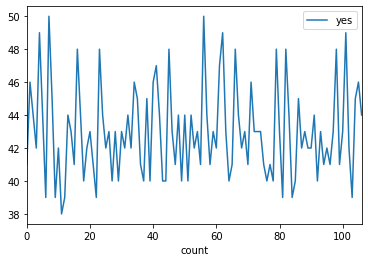

In [33]:
house_df.plot(kind='line', x='count', y='yes')

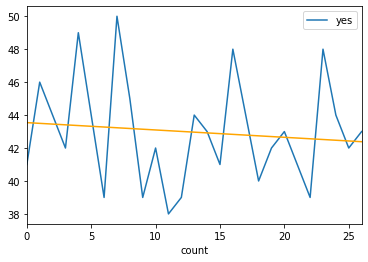

In [34]:
house_df_train = house_df.loc[80:].copy()
house_df_test = house_df.loc[:81].copy()

X_train = house_df_train[["count"]]
X_test = house_df_test[["count"]]
y_train = house_df_train["yes"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 0 to 50
X_new["count"] = np.linspace(0, 26, num=5)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new["count"]    # x values in Series.plot.line()
)

# plot the data, then the model
house_df_train.plot.line(x="count", y="yes")
y_new_.plot.line(color='orange')

Passed the Senate: Jan 16 2020

Timeline of data is from Dec 18 - Feb 1st

In [35]:
senate = approval_df.loc[125:330].copy()
senate.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
125,116772,63498,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/30/20,2/1/20,NaN,NaN,2/10/20 15:20,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,40.0,53.0
126,116773,63498,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/30/20,2/1/20,NaN,NaN,2/10/20 15:20,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,45.0,54.0
127,116770,63497,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/29/20,1/31/20,NaN,NaN,2/10/20 15:20,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,41.0,52.0
128,116771,63497,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/29/20,1/31/20,NaN,NaN,2/10/20 15:20,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,44.0,54.0
129,116441,63418,2020.0,NaN,Donald Trump,1189,Morning Consult,538,Politico,Morning Consult,...,1/29/20,1/30/20,NaN,NaN,2/1/20 08:13,NaN,https://morningconsult.com/wp-content/uploads/...,538,43.0,54.0


In [36]:
senate_df = senate.set_index('poll_id')
B = np.arange(len(senate_df))
B = np.flip(B,0)
senate_df['count'] = B
senate_df.reset_index(inplace = True)
senate_df

,poll_id,question_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no,count
0,63498,116772,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,2/1/20,NaN,NaN,2/10/20 15:20,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,40.0,53.0,205
1,63498,116773,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,2/1/20,NaN,NaN,2/10/20 15:20,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,45.0,54.0,204
2,63497,116770,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/31/20,NaN,NaN,2/10/20 15:20,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,41.0,52.0,203
3,63497,116771,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/31/20,NaN,NaN,2/10/20 15:20,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,44.0,54.0,202
4,63418,116441,2020.0,NaN,Donald Trump,1189,Morning Consult,538,Politico,Morning Consult,...,1/30/20,NaN,NaN,2/1/20 08:13,NaN,https://morningconsult.com/wp-content/uploads/...,538,43.0,54.0,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,63154,115079,2019.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,12/18/19,NaN,True,12/19/19 09:31,NaN,http://www.rasmussenreports.com/public_content...,Rasmussen,49.0,49.0,4
202,63177,115132,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,12/18/19,NaN,NaN,12/23/19 13:11,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,51.0,3
203,63177,115133,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,12/18/19,NaN,NaN,12/23/19 13:11,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,44.0,54.0,2
204,63183,115143,2020.0,NaN,Donald Trump,294,McLaughlin & Associates,NaN,NaN,McLaughlin & Associates,...,12/18/19,NaN,NaN,12/23/19 14:41,NaN,https://mclaughlinonline.com/pols/wp-content/u...,538,46.0,53.0,1


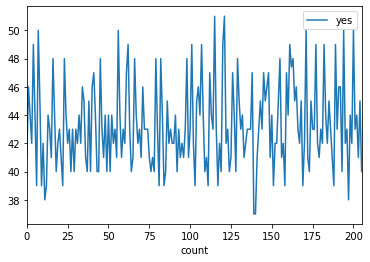

In [39]:
senate_df.plot(kind='line', x='count', y='yes')

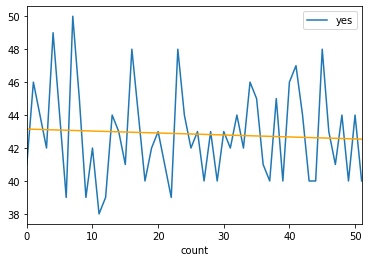

In [50]:
senate_df_train = senate_df.loc[154:].copy()
senate_df_test = senate_df.loc[:155].copy()

senate_X_train = senate_df_train[["count"]]
senate_X_test = senate_df_test[["count"]]
senate_y_train = senate_df_train["yes"]

senate_model = LinearRegression()
senate_model.fit(X=senate_X_train, y=senate_y_train)
senate_model.predict(X=senate_X_test)

senate_X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 0 to 50
senate_X_new["count"] = np.linspace(0, 51, num=5)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
senate_y_new_ = pd.Series(
    senate_model.predict(senate_X_new), # y values in Series.plot.line()
    index=senate_X_new["count"]    # x values in Series.plot.line()
)

# plot the data, then the model
senate_df_train.plot.line(x="count", y="yes")
senate_y_new_.plot.line(color='orange')

Acquitted: Feb 5

In [ ]:
acquitted = approval_df.loc[0:].copy()
acquitted.head()

In [ ]:
acq_df = acquitted.set_index('poll_id')
C = np.arange(len(acq_df))
C = np.flip(C,0)
acq_df['count'] = C
acq_df.reset_index(inplace = True)
acq_df

In [ ]:
acq_df.plot(kind='scatter', x='count', y='yes')

In [ ]:
acq_df_train = acq_df.loc[5133:].copy()
acq_df_test = acq_df.loc[:5144].copy()

acq_X_train = acq_df_train[["count"]]
acq_X_test = acq_df_test[["count"]]
acq_y_train = acq_df_train["yes"]

acq_model = LinearRegression()
acq_model.fit(X=acq_X_train, y=acq_y_train)
acq_model.predict(X=acq_X_test)

acq_X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 0 to 50
acq_X_new["count"] = np.linspace(0, 1700, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
acq_y_new_ = pd.Series(
    acq_model.predict(acq_X_new), # y values in Series.plot.line()
    index=acq_X_new["count"]    # x values in Series.plot.line()
)

# plot the data, then the model
acq_df_train.plot.scatter(x="count", y="yes")
acq_y_new_.plot.line(color='orange')